In [143]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.api import abline_plot
import random

### Background Behind Predictions: Variable and Correlation
#### Variable
We see many variables in our daily life. We define variables as symbols that represent some numbers. For instance, your friend Billy is now 10 years old. We can define a varaible that represents his age. Let's say the name of our varaible is billy_age, and it has a value of 10.

In [144]:
billy_age = 10
print("My friend Billy is now %d years old. " % billy_age)

My friend Billy is now 10 years old. 


In Python programming languages, we use '=' as assign operator that assigns a value to a variable. In our last exaple, we defined our varaible with name 'billy_age' and assigned its value to be 10.

#### Correlation
Two variables might have correlation to each other. For instance, your friend's exam score might be correlated to the number of hours he spends on his homework. The number of items a store sold can be correlated to the discount rate, etc. Correlation could be positive, meaning both variables move in the same direction, or negative, meaning that when one variable's value increases, the other variables' values decrease. Let's examine the plot of correlated variables.

We first define a function that generates data based on the correlation between the two and plot the graph.

In [146]:
def correlation_plot(corr=1.0):
    random.seed(1066)
    size = 1000 # Sample size of the observed data
    mean = [0, 0] # Mean zero
    R = np.matrix([[1, corr],[corr, 1]]) 
    x1, x2 = np.random.multivariate_normal(mean, R, size).T # Draw the observed data
    plt.figure(figsize=(10, 6))
    plt.scatter(x1, x2, marker='*')
    plt.grid(b=True)
    plt.xlim(-4, 4)
    plt.ylim(-4, 4)
    plt.xlabel('Varaible x1', fontsize = 16)
    plt.ylabel('Variable x2', fontsize = 16)
    plt.title('Correlation Between x1 and x2 with correlation of %.1f' % (corr), fontsize = 20)

Let's say our two variables, x1 and x2 have correlation of 1.0. That is, they are perfectly positively correlated to each other. What kind of graph can we expect? Can you think of a real life example of this?

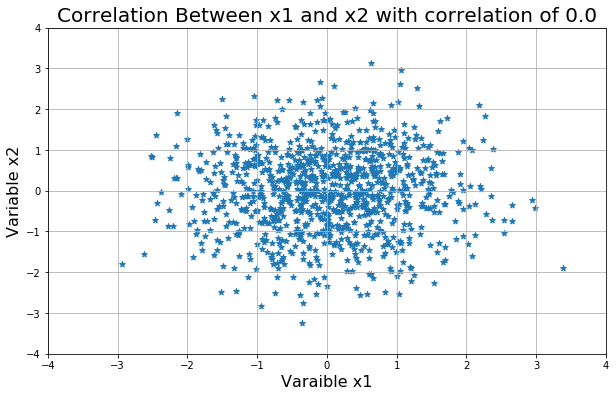

In [147]:
correlation_plot(0.0)

Similarly, let's examine correlation of 0.5 and 0.

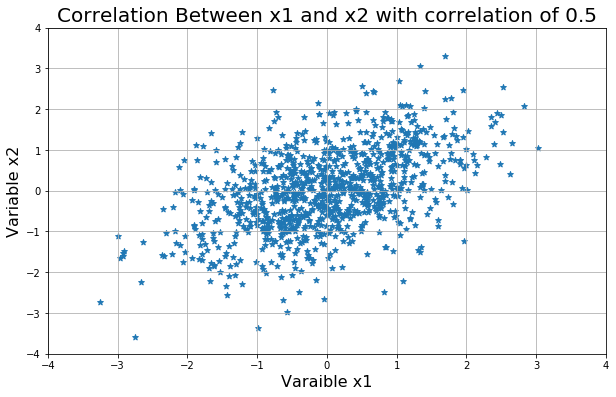

In [148]:
correlation_plot(0.5)

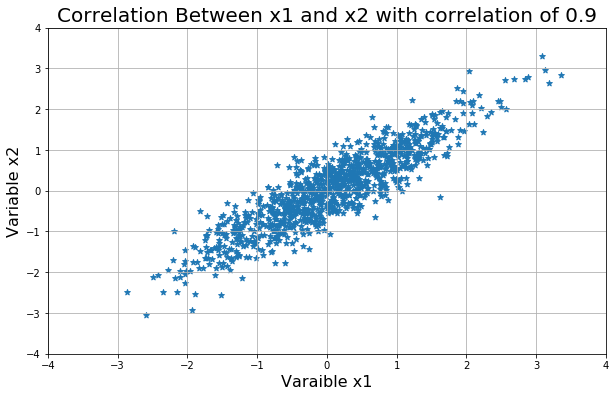

In [149]:
correlation_plot(0.9)

### Idea Behind Prediction: Best Fitted Line
For the above scatter plot, do you observe any trends in data? How are we supposed to plot this trend? Well, we can draw a line that represents this trend. We will make some changes to the original function to plot this line.

In [152]:
def correlation_plot_with_line(corr=1.0):
    figure, ax = plt.subplots(figsize=(10, 6))
    random.seed(1066)
    size = 1000 # Sample size of the observed data
    mean = [0, 0] # Mean zero
    R = np.matrix([[1, corr],[corr, 1]]) 
    x1, x2 = np.random.multivariate_normal(mean, R, size).T # Draw the observed data
    data = pd.merge(pd.DataFrame(x1), pd.DataFrame(x2), left_index=True, right_index=True)
    data.rename(columns={'0_x':'x1', '0_y':'x2'}, inplace=True)
    plt.scatter(x1, x2, marker='*')
    # abline plot
    mod = smf.ols(formula='x1 ~ x2', data = data).fit()
    abline_plot(model_results=mod, ax=ax, color='red')
    plt.grid(b=True)
    plt.xlim(-4, 4)
    plt.ylim(-4, 4)
    plt.xlabel('Varaible x1', fontsize = 16)
    plt.ylabel('Variable x2', fontsize = 16)
    plt.title('Correlation Between x1 and x2 with correlation of %.1f' % (corr), fontsize = 20)

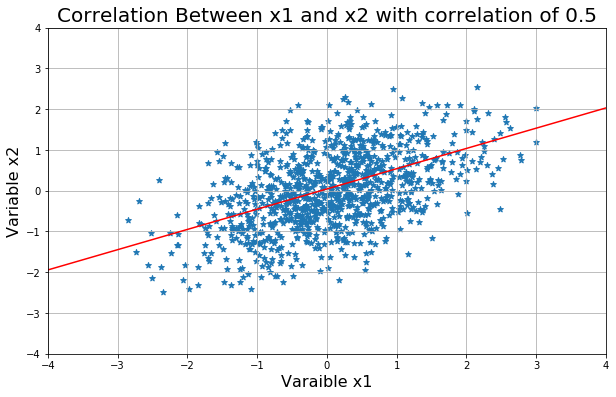

In [153]:
correlation_plot_with_line(0.5)

As you can see, now we have a line that represents the trend in our data. Now let's ask ourselves a question: How can we make predictions of the future values based on the past values?

#### Problem: given two variables x and y, how can we predict y values based on x values? More specifically, given x1, x2, x3,..,x100 and y1, y2, y3,..,y100, can we predict y101? 

Example: x = [10,20,30,50] and y = [11,21,31,51], can we predict the y value when x is 60? 

#### Answer: 

Yes. We can predict the future y value based on x values. We define the function to be

#### y = mx + b 

in which m is the correlation coefficient between x and y, plus a random noise term of b. This looks familar, right? Sometimes x can be a matrix that contains multiple varaibles. In this case, each varaible contributes a certain weight to the y varaible. This is called a weighted sum. For instance, your friend Billy's exam score is correlated to three varaibles. 1) Number of hours he spend on his hw 2) Number of hours he spend on video games and 3) Number of burgers he eat in the past 30-days. We can likely expect our correlation coefficients, m, of varaible 1) and 2) to be high while the last one to be low, as it does not has any correlations to the exam score.

Formally, this model can be defined as 

#### Billy's exam score = m1 x hours he spend on hw + m2 x hours he spend on video games + m3 x number of burgers he had in the past 30 days + b1 + b2 + b3

And congradulations, you have now understand the basics of Linear Regression Model (LRM). LRM says, to predict our future y value based on existing x values, we must find a best fitted line between the two varaibles that best describes the relationship between x and y. In other words, our job is to find the best correlation coefficients. The process of finding the best fitted line is called optimization. I won't go into great details about this because computers will do all the heavy lifting for us.

In the previous example, let's say his final exam score is 81. The number of hours he spend on hw is 56 and he spend 41 hours on games. Lastly, he had 21 burgers. Our model would become

#### Y = mX + b 
####    = m1 x x1 + m2 x x2 + m3 x x3 + (b1 + b2 + b3)

Plug-in the values, we have 

#### 81(Score) = m1 x 56(hw) + m2 x 41(games) + m3 x 21(burgers) + b1(noise1) + b2(noise2) + b3(noise3)

LR says, we need to find the best m1, m2, m3 to describes the correlation between score and all three varaibles. Sometimes the data cannot be used directly and some works need to be done to preprocess the x values before we can plug them into the model. I won't go into details on them. Keep in mind that the goal here is for you to learn the idea behind the model.

### Using Linear Regression Model to Predict Housing Price 

#### Part I: Price Forecaste Based on Property Features

Alright, here comes the exciting part. Based on what have learned, let's predict the price of a real-estate property based on its features. A property has many features. For instance, number of bathrooms, number of bedrooms, size, etc. Before we continue, let's brainstorm for a while..and think about what features might have the best correlation (aka. what features best explain the housing price) with the housing price.

In real-world projects, since the data we have might contains many different features, some techniques are needed to extract the features that best describes the dependent varaibles. For instance, a correlation matrix might be used to determine the correlations. Or, PCA can also be applied. To keep things simple, we will use three features to predict the housing price, which is land_sq_feet, gross_sq_feet, year_built

#### Problem Formulation

Given a set of property features (square feet, year built, number of bathrooms, etc), predict this property's price.

#### Y = mX + b
#### Price = m1 x square_feet + m2 x year_built +...+ b1 + b2 +...
#### Goal: find best m to describes relationship between X and Y

We will be using the NYC property sales data.

In [154]:
# read in data and explores it for a little bit 
nyc_homes = pd.read_csv("NYChome_sales2012.csv")
nyc_homes.head(3)

,Unnamed: 0,borough,neighborhood,block,lot,easement,building_class_present,address,zip_code,commmercial_units,land_sq_feet,gross_sq_feet,year_built,sale_price,sale_date
0,204018,4,LAURELTON,12941,94,NaN,A2,131-43 FRANCIS LEWIS BLVD,11413,0,3560,1473,1940,0,2012-01-01
1,217555,2,BATHGATE,3046,42,NaN,A1,2069 BATHGATE AVE,10457,0,1964,1424,1899,345376,2012-04-05
2,217598,2,BAYCHESTER,4707,70,NaN,A5,1134 EAST 213 STREET,10469,0,2320,1813,1950,335700,2012-05-17


In [155]:
nyc_homes.columns

Index(['Unnamed: 0', 'borough', 'neighborhood', 'block', 'lot', 'easement',
       'building_class_present', 'address', 'zip_code', 'commmercial_units',
       'land_sq_feet', 'gross_sq_feet', 'year_built', 'sale_price',
       'sale_date'],
      dtype='object')

In [156]:
nyc_homes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14611 entries, 0 to 14610
Data columns (total 15 columns):
Unnamed: 0                14611 non-null int64
borough                   14611 non-null int64
neighborhood              14611 non-null object
block                     14611 non-null int64
lot                       14611 non-null int64
easement                  0 non-null float64
building_class_present    14611 non-null object
address                   14611 non-null object
zip_code                  14611 non-null int64
commmercial_units         14611 non-null int64
land_sq_feet              14611 non-null int64
gross_sq_feet             14611 non-null int64
year_built                14611 non-null int64
sale_price                14611 non-null int64
sale_date                 14611 non-null object
dtypes: float64(1), int64(10), object(4)
memory usage: 1.7+ MB


In [157]:
# preprocess the dataset and keep the columns we are interested in 
# clean it 
nyc_homes = nyc_homes[['land_sq_feet', 'gross_sq_feet', 'year_built', 'sale_price']]
nyc_homes = nyc_homes[(nyc_homes.sale_price != 0) & (nyc_homes.land_sq_feet != 0) & (nyc_homes.gross_sq_feet != 0) \
                     & (nyc_homes.year_built != 0)]
nyc_homes = nyc_homes.dropna()

In [158]:
nyc_homes.head(3)

,land_sq_feet,gross_sq_feet,year_built,sale_price
1,1964,1424,1899,345376
2,2320,1813,1950,335700
3,1710,1813,1945,338000


In [159]:
nyc_homes.shape

(9182, 4)

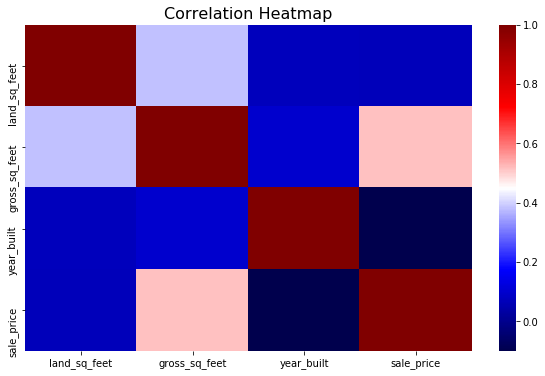

In [160]:
# draw a correlation map
plt.figure(figsize=(10,6))
plt.title('Correlation Heatmap', fontsize=16)
corr = nyc_homes.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='seismic')

As we can observe from the graph, sale_price has relatively high correlation with land_sq_feet (around 0.4) and gross_sq_feet (around 0.5). It has little or no relevance with year_built parameter. 
#### Notice: For more detailed studies, we need to dig into co-linearlity issues between gross_sq_feet and land_sq_feet. To keep things simple, I will skip this part.

In [161]:
from sklearn.model_selection import train_test_split
X, Y = nyc_homes[['land_sq_feet', 'gross_sq_feet', 'year_built']], nyc_homes[['sale_price']]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=20)

In [162]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(x_train, y_train)
pred = reg.predict(x_test)

In [163]:
# r2 score ranging from 0 to 1. 
reg.score(x_test, y_test)

0.2120839762799176

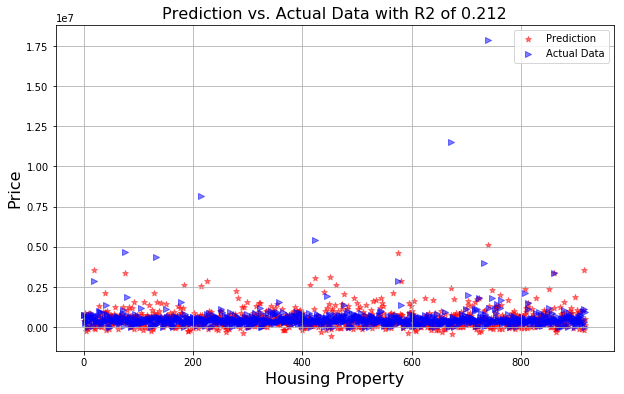

In [164]:
plt.figure(figsize=(10,6))
plt.grid(b=True)
plt.xlabel('Housing Property', fontsize=16)
plt.ylabel('Price', fontsize=16)
plt.title('Prediction vs. Actual Data with R2 of 0.212', fontsize=16)
# plot the prediction
plt.scatter(range(len(pred)), pred, marker = '*', alpha = 0.5, color='red', label='Prediction')
# plot the actual data 
plt.scatter(range(len(pred)), y_test, marker = '>', alpha = 0.5, color='blue', label='Actual Data')
plt.legend(loc='best')

Based on the R2 score, our model explains 21.2% Of the actual data. 

#### Future Work
Since this is a tutorial and my audience is 10 years old students, I won't go too much deeper into the technical details. But here is a list of things that can be done to improve our model:

#### 1) Use PCA to create new features (eigen values is determined by whether or not it explains 80% of the variance
#### 2) Use only the feature with highest correlation with price (sq_feet), and our model would become a single varaible LR
#### 3) Find more data to predict the results 
#### 4) Use a voting mechanism, (e.g. Logistic Regression, Random Forest, etc) and use the model with the best performance 

#### For industrial usage: 
#### 1) Partition the dataset into zipcode level and use transactions from past 30 days so that the accuracy can be guaranteed

### Beyond LR: General Approach on Data Science Problems 

#### Problem Definition 
   - What problems are we trying to solve? 
   - Is this problem quantifiable? What data and features can we use to solve this problem?
#### Data acquisition & validation
   - Is our data source reliable? 
   - What techniques can we use to clean our dataset?
#### Data Preprocessing
   - Z-normalization
   - garbage value handling: drop/replace/fill
   - feature engineering/extraction
   - dimensionality reduction: Principal Component Analysis
#### Model 
   - Which model best explains the relationship between our dependent varaible and independent varaible?
   - Which parameters give us the best results? (i.e. goodness of fit, R2)
#### Optimization & Test 
   - Is our model and report justifiable? 
   - Ways that we can test our data? (For housing data, generally a back-test method is used)

### Appendix: Model Optimization

In [165]:
nyc_homes = pd.read_csv("NYChome_sales2012.csv", sep=',', parse_dates=['sale_date'], \
                       infer_datetime_format=True)
nyc_homes.head(3)

,Unnamed: 0,borough,neighborhood,block,lot,easement,building_class_present,address,zip_code,commmercial_units,land_sq_feet,gross_sq_feet,year_built,sale_price,sale_date
0,204018,4,LAURELTON,12941,94,NaN,A2,131-43 FRANCIS LEWIS BLVD,11413,0,3560,1473,1940,0,2012-01-01
1,217555,2,BATHGATE,3046,42,NaN,A1,2069 BATHGATE AVE,10457,0,1964,1424,1899,345376,2012-04-05
2,217598,2,BAYCHESTER,4707,70,NaN,A5,1134 EAST 213 STREET,10469,0,2320,1813,1950,335700,2012-05-17


In [166]:
nyc_homes.dtypes

Unnamed: 0                         int64
borough                            int64
neighborhood                      object
block                              int64
lot                                int64
easement                         float64
building_class_present            object
address                           object
zip_code                           int64
commmercial_units                  int64
land_sq_feet                       int64
gross_sq_feet                      int64
year_built                         int64
sale_price                         int64
sale_date                 datetime64[ns]
dtype: object

In [167]:
# define dropped columns 
cols = ['easement', 'address', 'building_class_present', 'neighborhood', 'sale_date', 'Unnamed: 0']
nyc_homes = nyc_homes.drop(columns=cols)
nyc_homes = nyc_homes.astype(float)
nyc_homes = nyc_homes.replace(0, None)
nyc_homes = nyc_homes.dropna()
nyc_homes.isnull().sum()

borough              0
block                0
lot                  0
zip_code             0
commmercial_units    0
land_sq_feet         0
gross_sq_feet        0
year_built           0
sale_price           0
dtype: int64

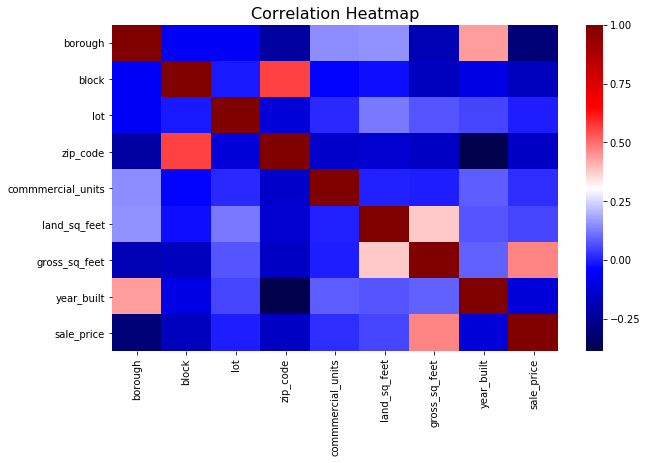

In [168]:
# draw correlation matrix of all features
nyc_homes = nyc_homes.astype(float)
plt.figure(figsize=(10,6))
plt.title('Correlation Heatmap', fontsize=16)
corr = nyc_homes.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='seismic')

In [169]:
# now let's take a look at what features are high correlated with 
corr['sale_price']

borough             -0.300678
block               -0.162139
lot                 -0.001726
zip_code            -0.149435
commmercial_units    0.024969
land_sq_feet         0.055235
gross_sq_feet        0.474177
year_built          -0.113824
sale_price           1.000000
Name: sale_price, dtype: float64

Clearly we can see that gross_sq_feet has the most correlation to the housing price. Now let's run PCA to see what happens.

In [170]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
# get X and Y
Y = np.array(nyc_homes.sale_price).reshape(-1,1)
X = nyc_homes.drop(columns=['sale_price'])
# normalization
X_norm = normalize(X)

In [171]:
print("Normalized X: ", X_norm)

Normalized X:  [[2.24895973e-04 7.27594697e-01 5.28505537e-03 ... 2.00157416e-01
  8.28179421e-02 1.09074547e-01]
 [1.76693885e-04 2.69104787e-01 3.71057159e-03 ... 1.73513395e-01
  1.25806046e-01 1.67770844e-01]
 [1.66532233e-04 3.91933610e-01 5.82862815e-03 ... 1.93177390e-01
  1.50961469e-01 1.62368927e-01]
 ...
 [3.63954132e-04 5.35376528e-01 1.52860736e-03 ... 3.18605447e-01
  1.65963084e-01 1.45654444e-01]
 [3.50009137e-04 5.14863440e-01 2.24005848e-03 ... 3.94740304e-01
  1.96705135e-01 1.40073657e-01]
 [3.72936914e-04 5.48590200e-01 3.95313128e-03 ... 2.31146299e-01
  1.79009719e-01 1.49398528e-01]]


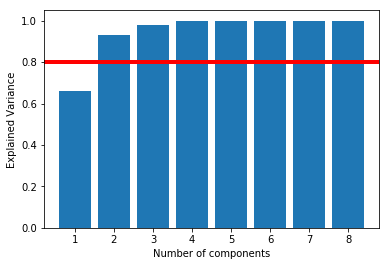

In [172]:
#perform PC decomposition 
n = 8
pca = PCA(n)
data = pca.fit_transform(X_norm)
eigenvalues = pca.explained_variance_ratio_
#plot explained variance over the number of compinents
plt.axhline(y=0.8, linewidth=4, color='r')
plt.bar(np.arange(1, n + 1), eigenvalues[:n].cumsum())
plt.xlabel("Number of components")
plt.ylabel("Explained Variance")
plt.show()

PCA tells us we can use two components to explain 80% of the variance.

In [173]:
eigenvalues.cumsum()

array([0.6619719 , 0.93123694, 0.97888405, 0.99804921, 0.99944368,
       0.99999995, 1.        , 1.        ])

### Approach 1: Let's try fitting the model using the mostly correlated features, gross_sq_feet and land_sq_feet

In [174]:
X = X[['gross_sq_feet', 'land_sq_feet']]
X_norm_f = normalize(X)
x_train, x_test, y_train, y_test = train_test_split(X_norm_f, Y, test_size=0.1, random_state=20)
reg = LinearRegression().fit(x_train, y_train)
pred = reg.predict(x_test)
reg.score(x_test, y_test)

0.2727550783826358

Now our model explains 27% of the variance, which is slightly better than the first one, which is 21%.

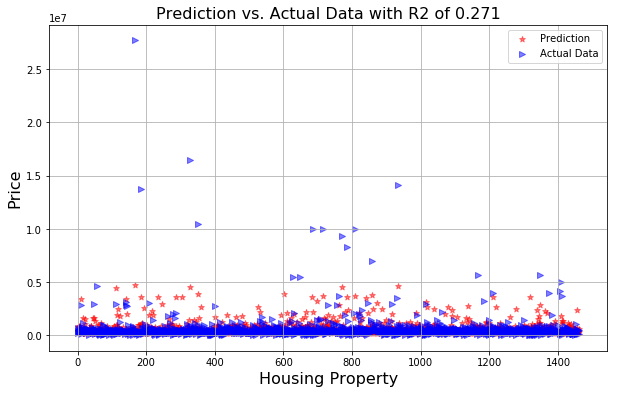

In [175]:
plt.figure(figsize=(10,6))
plt.grid(b=True)
plt.xlabel('Housing Property', fontsize=16)
plt.ylabel('Price', fontsize=16)
plt.title('Prediction vs. Actual Data with R2 of 0.271', fontsize=16)
# plot the prediction
plt.scatter(range(len(pred)), pred, marker = '*', alpha = 0.5, color='red', label='Prediction')
# plot the actual data 
plt.scatter(range(len(pred)), y_test, marker = '>', alpha = 0.5, color='blue', label='Actual Data')
plt.legend(loc='best')

### Approach 2: Using PCA

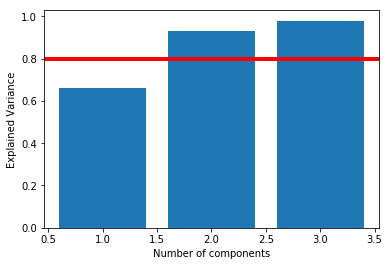

In [140]:
n = 3
pca = PCA(n)
data = pca.fit_transform(X_norm)
eigenvalues = pca.explained_variance_ratio_
#plot explained variance over the number of compinents
plt.axhline(y=0.8, linewidth=4, color='r')
plt.bar(np.arange(1, n + 1), eigenvalues[:n].cumsum())
plt.xlabel("Number of components")
plt.ylabel("Explained Variance")
plt.show()

In [141]:
# now fit the linear regression with the first three components
x_train, x_test, y_train, y_test = train_test_split(data[:,:3], Y, test_size=0.1, random_state=20)
reg = LinearRegression().fit(x_train, y_train)
pred = reg.predict(x_test)
reg.score(x_test, y_test)

0.3605125267982947

By using PCA, we have improved our score from 0.27 to 0.36

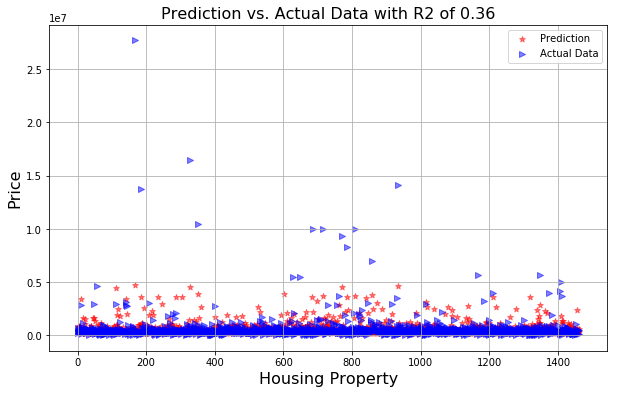

In [176]:
plt.figure(figsize=(10,6))
plt.grid(b=True)
plt.xlabel('Housing Property', fontsize=16)
plt.ylabel('Price', fontsize=16)
plt.title('Prediction vs. Actual Data with R2 of 0.36', fontsize=16)
# plot the prediction
plt.scatter(range(len(pred)), pred, marker = '*', alpha = 0.5, color='red', label='Prediction')
# plot the actual data 
plt.scatter(range(len(pred)), y_test, marker = '>', alpha = 0.5, color='blue', label='Actual Data')
plt.legend(loc='best')